In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import json
import csv
import sys
import time
import datetime
from lib import bitmex
from lib.bitmex import BitMEX
from settings import API_BASE, API_KEY, API_SECRET
from numpy import mean,absolute 
import scipy as sp
from scipy.stats import *
from scipy.stats import skew, kurtosis
from scipy.signal import *
def mad(data):
    return mean(absolute(data-mean(data)))


plt.rcParams['figure.figsize'] = [40, 50]



In [28]:

plt.rcParams['figure.figsize'] = [40, 30]


In [ ]:

## Short Only ##  (Why is it backwards???)
leverage = 10

var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 9))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(300, length):
    cci_absolute_edge = 500
    himax[i] = RS_F[i]*cci_absolute_edge-100#CCI105C[i]/CCI105C[i-10]-150
    lomax[i] = 1/(RS_F[i]**2.2)*-1*cci_absolute_edge
    hi = himax[i]
    lo = lomax[i]
    jmax = 2
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i]   
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]

            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
for i in range(0, len(price)-1):
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 7] = pnl[i+1]
    price[i, 8] = pnlT[i+1]
J = np.arange(1, 1000)
plt.subplot(4,1,1)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, var[J])
plt.plot(J, CCI1[J])

plt.subplot(4,1,2)
#plt.plot(range())
plt.plot(J, close[J])
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,3)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2','pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
#print(price)
plt.show()

In [ ]:

## Short Only ##  (Why is it backwards???)
leverage = 10

var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =500
    himax[i] = RS_F[i]**1.1*cci_absolute_edge-320
    lomax[i] = 1/(RS_F[i]**1.2)*-1*cci_absolute_edge*0.8+350
    hi = himax[i]
    lo = lomax[i]
    #hi =100
   # lo =25
    jmax = 2
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
J = np.arange(2000,5000)
plt.subplot(4,1,1)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, var[J])
plt.plot(J, CCI1[J])

plt.subplot(4,1,2)
#plt.plot(range())
plt.plot(J, close[J])
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,3)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl, 100, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
#print(price)
plt.show()
pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

In [ ]:

## Short Only ##  (Why is it backwards???)
leverage = 10

var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =700
    himax[i] = RS_F_205[i]**1.2*cci_absolute_edge-500
    lomax[i] = 1/(RS_F_205[i]**1.4)*-1*cci_absolute_edge+600
    hi = himax[i]
    lo = lomax[i]
    #hi =100
   # lo =25
    jmax = 2
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
J = np.arange(2000,5000)
plt.subplot(4,1,1)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, var[J])
plt.plot(J, CCI1[J])

plt.subplot(4,1,2)
#plt.plot(range())
plt.plot(J, close[J])
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,3)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl, 100, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
plt.show()
pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

In [ ]:

## Short Only ##  (Why is it backwards???)
leverage = 25

var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =300
    himax[i] = RS_F_205[i]**1.2*cci_absolute_edge-20
    lomax[i] = 1/(RS_F_205[i]**1.1)*-1*cci_absolute_edge+20
    hi = himax[i]
    lo = lomax[i]
    #hi =100
   # lo =25
    jmax = 2
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
J = np.arange(1, l)
plt.subplot(4,1,1)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, var[J])
plt.plot(J, CCI1[J])

plt.subplot(4,1,2)
#plt.plot(range())
plt.plot(J, close[J])
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,3)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl, 100, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
plt.show()
pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

In [ ]:

## Short Only ##  (Why is it backwards???)
leverage = 10

var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =100
    himax[i] = RS_F_35[i]**1*cci_absolute_edge/RS_F_205[i]**2
    lomax[i] = (1/(RS_F_35[i]**5)*-1*cci_absolute_edge)*RS_F_205[i]**1
    hi = himax[i]
    lo = lomax[i]
    #hi =0
    #lo =-10
    jmax = 4
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
J = np.arange(1, l)
plt.subplot(4,1,1)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, var[J])
plt.plot(J, CCI1[J])

plt.subplot(4,1,2)
#plt.plot(range())
plt.plot(J, close[J])
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,3)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl, 100, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
plt.show()
pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

In [ ]:

## Short Only ##  (Why is it backwards???)
leverage = 10

var = CCI105B
var2 = RS_F_105
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =150
    himax[i] = var2[i]**0.5*cci_absolute_edge/RS_F_205[i]-200
    lomax[i] = 1/(var2[i]**0.5)*-1*cci_absolute_edge+200
    hi = himax[i]
    lo = lomax[i]
    #hi =100
   # lo =25
    jmax = 2
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
J = np.arange(1, l)
J2 = np.arange(1000, 2000)
plt.subplot(4,1,1)
plt.plot(J2, himax[J2])
plt.plot(J2, lomax[J2])
plt.plot(J2, var[J2])
plt.plot(J2, CCI1[J2])
axes = plt.gca()

axes.set_ylim([-1000,1000])

plt.subplot(4,1,2)
#plt.plot(range())
plt.plot(J, close[J])
xcoords = price[:,2]
for xc in xcoords:
    plt.axvline(x=xc, color = 'g')
xcoords2 = price[:,3]
for xc in xcoords2:
    plt.axvline(x=xc, color = 'r')
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,3)
plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl, 100, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
plt.show()


1.037924231258793
0.6000978030172662
1.0589439827446185
127.62745098039215
0
[8.25730787]


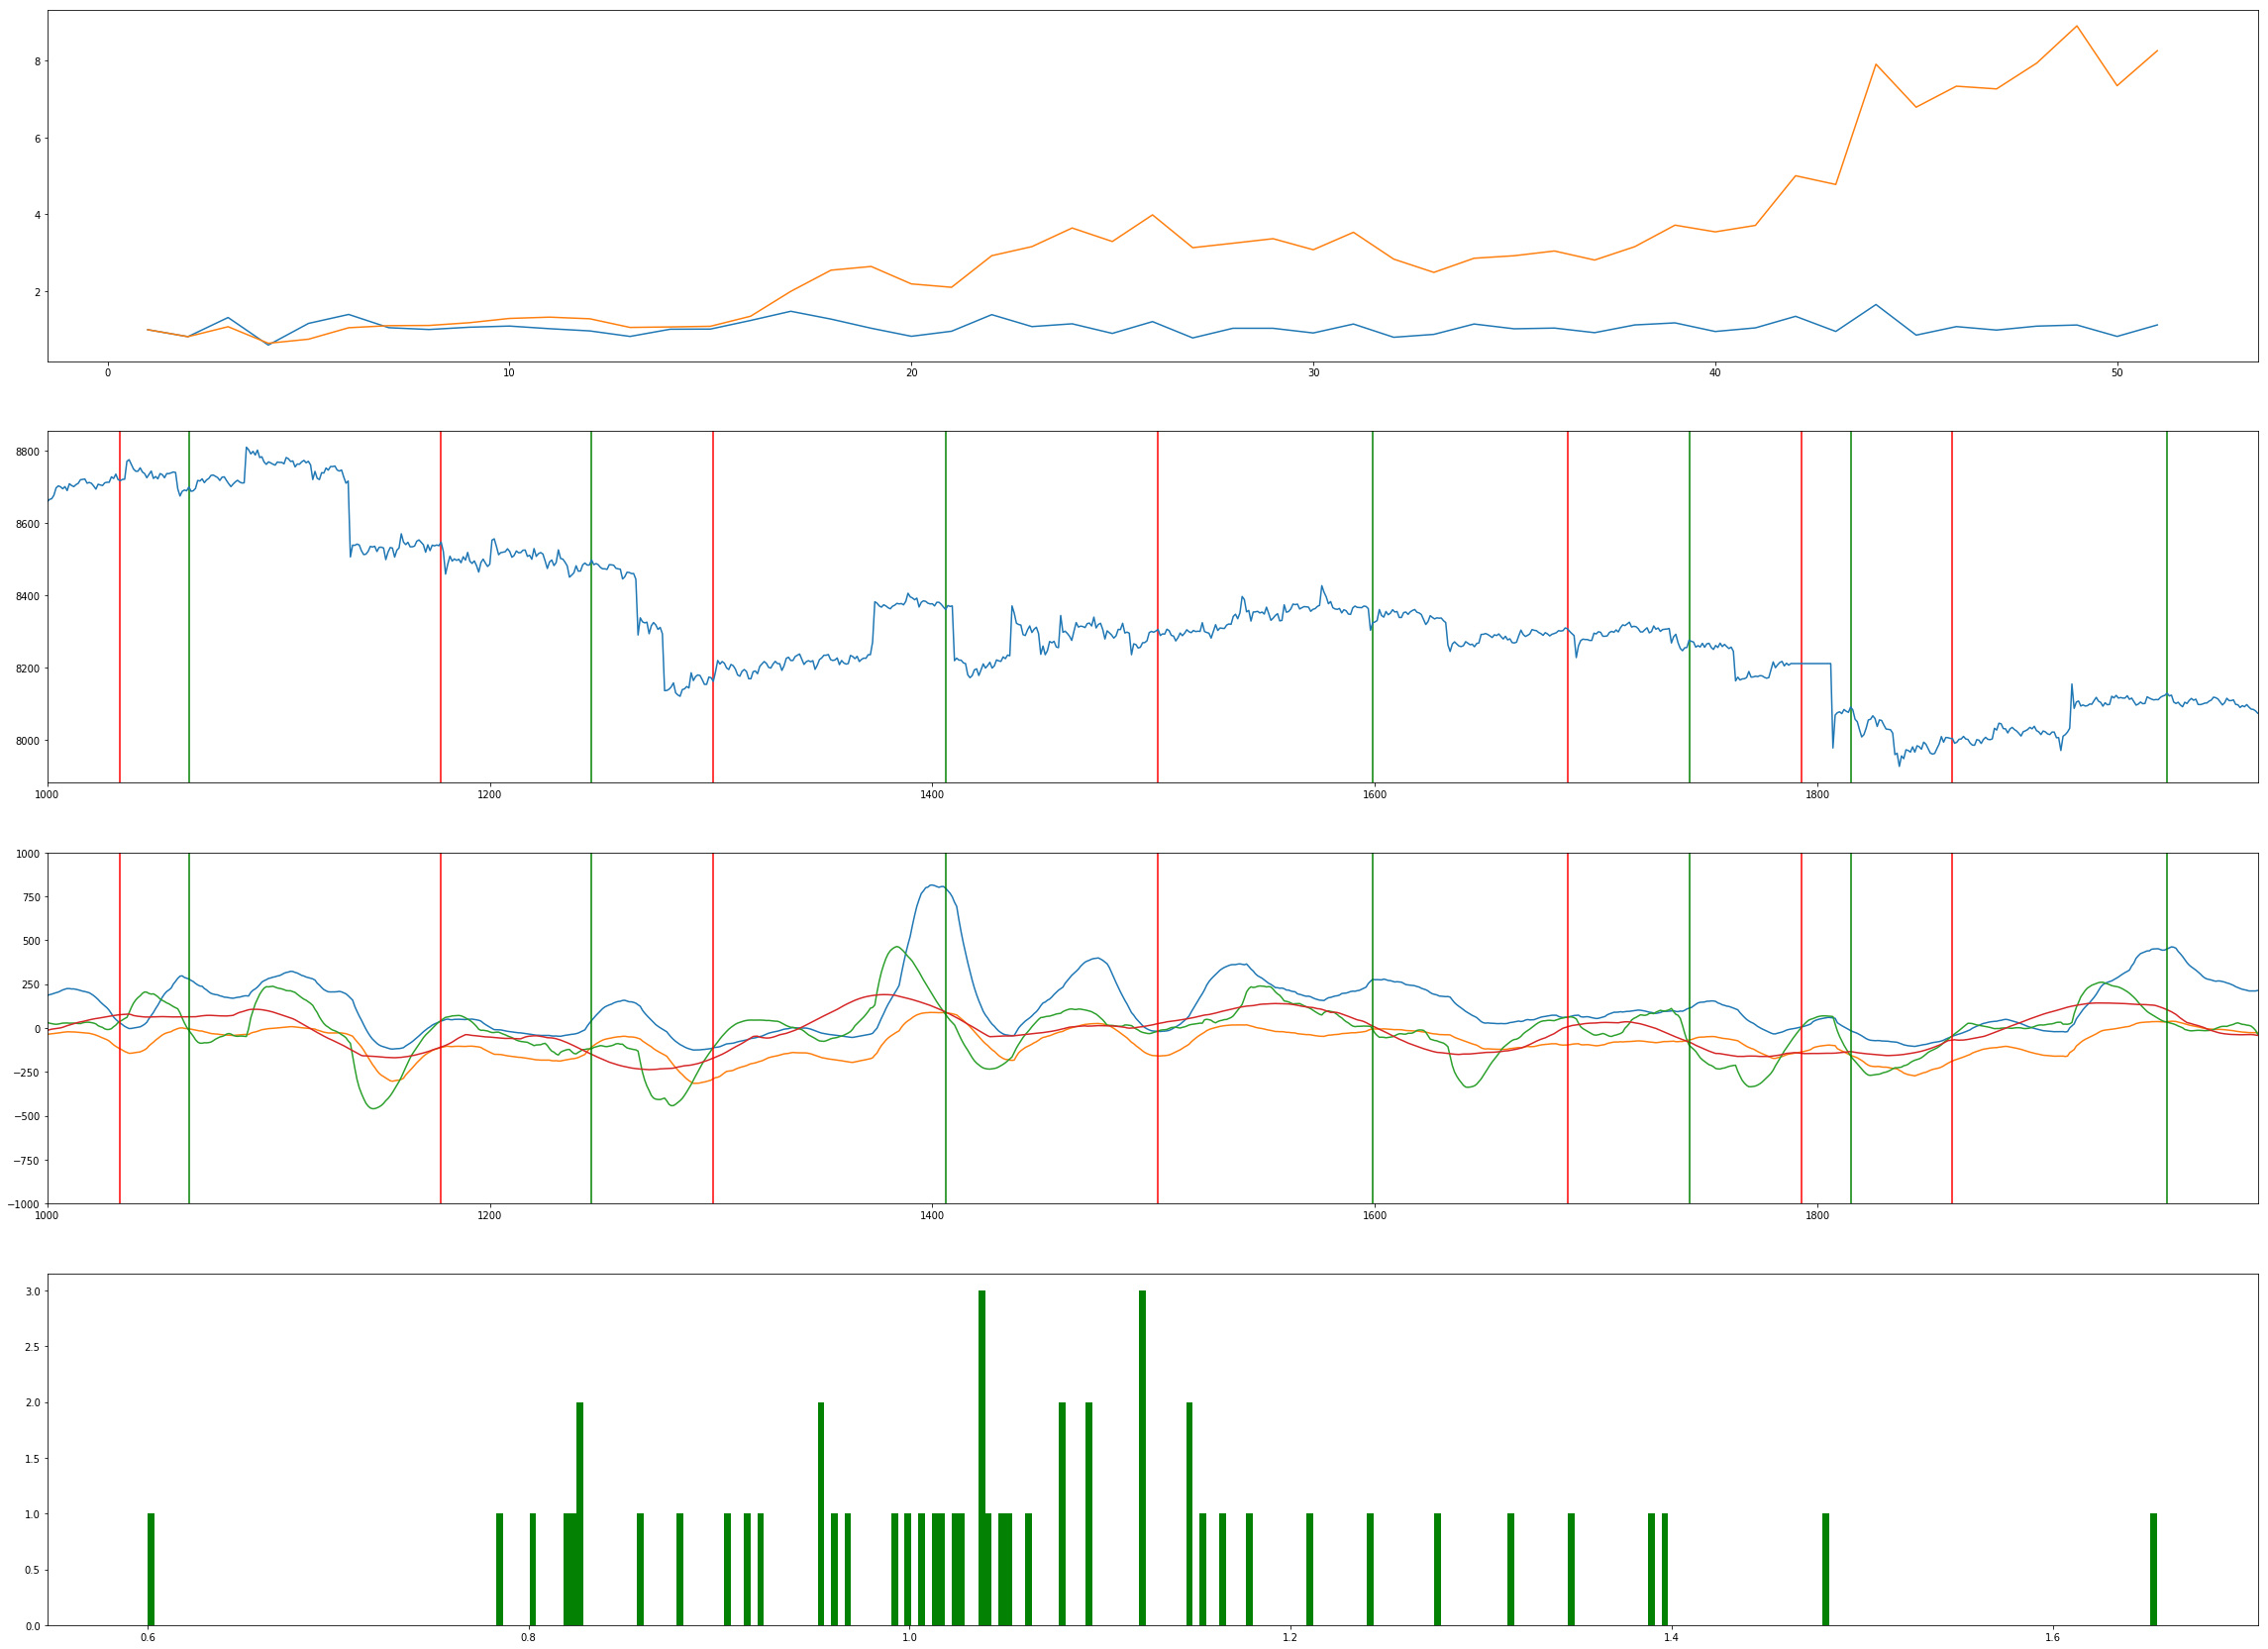

AttributeError: module 'pandas.util' has no attribute 'terminal'

In [114]:

## Short Only ##  (Why is it backwards???)
leverage = 10

var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =400
    himax[i] = RS_F_105[i]**1.6*cci_absolute_edge-250
    lomax[i] = 1/(RS_F_105[i]**0.7)*-1*cci_absolute_edge+350
    hi = himax[i]
    lo = lomax[i]
    #hi =0
    #lo =-25
    jmax = 2
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
J = np.arange(1000, 2000)

##Indicators and Executions
plt.subplot(4,1,3)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, CCI105B[J])
plt.plot(J, CCI1[J])
xcoords = price[1:10,2]
for xc in xcoords:
    plt.axvline(x=xc, color = 'g')
xcoords2 = price[1:10,3]
for xc in xcoords2:
    plt.axvline(x=xc, color = 'r')
axes = plt.gca()
axes.set_xlim([min(J),max(J)])
axes.set_ylim([-1000, 1000])
#plt.subplot(3,1,1)
#plt.plot(range())



#Plotting Close Prices and Trades
plt.subplot(4,1,2)
xcoords = price[:,2]
for xc in xcoords:
    plt.axvline(x=xc, color = 'g')
xcoords2 = price[:,3]
for xc in xcoords2:
    plt.axvline(x=xc, color = 'r')
plt.plot(J, close[J])
axes = plt.gca()
axes.set_xlim([min(J),max(J)])



##Profit & Loss##
plt.subplot(4,1,1)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')


##Pnl Histogram ##
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl,300, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(np.median(pnl))
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
#print(price)
plt.show()
pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

In [86]:
1/leverage

0.1

1.0
0.8613250883392228
0.9683386818570506
151.0
0
[0.83749573]


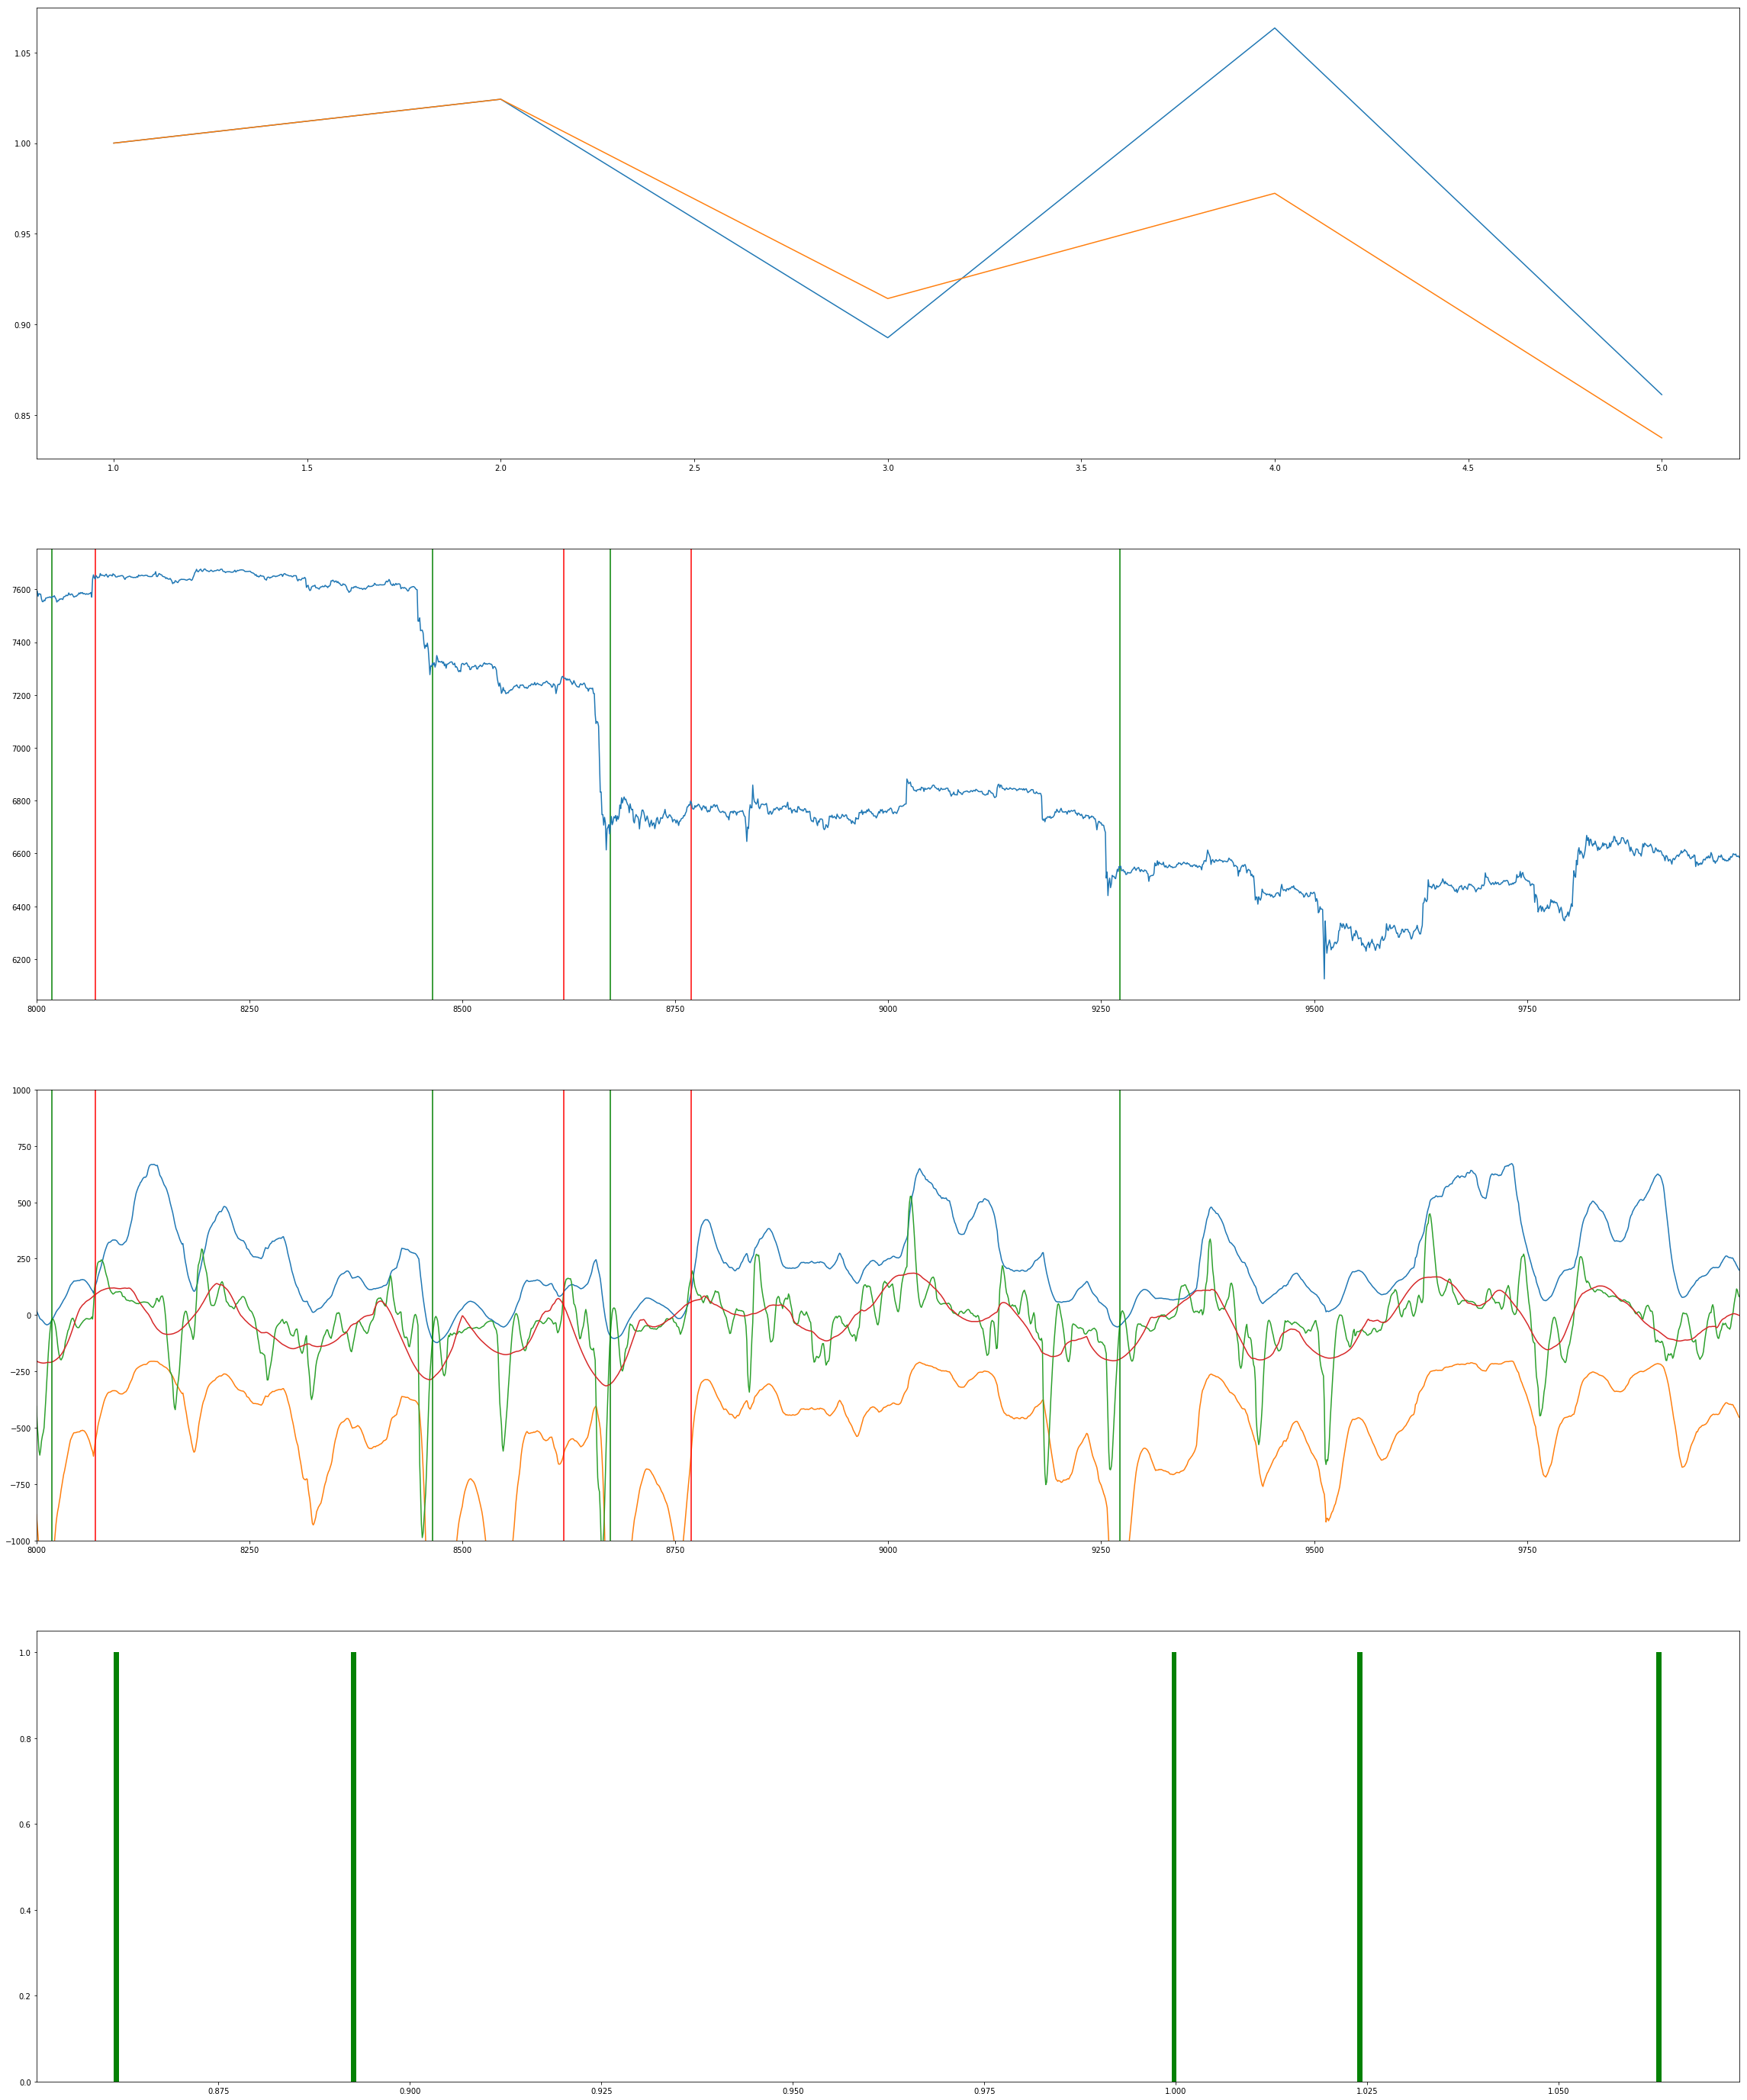

        1       2  time_in     time  length        CCI1        CCI2  \
0  7301.0  7272.5   4414.0   4869.0   455.0  -17.387652  290.586306   
1  7568.5  7639.0   8018.0   8069.0    51.0  -18.826231  150.832218   
2  7321.0  7264.0   8465.0   8619.0   154.0 -105.474923  102.138737   
3  6708.0  6792.0   8674.0   8769.0    95.0  -79.053751  181.627455   
4  6546.5  6469.5   9272.0  10247.0     0.0  -34.580347  167.740345   

     CCIReal1    CCIReal2       pnl      pnlT  
0 -247.858725  125.522751  1.024189  1.024189  
1 -208.566623   90.244120  0.892710  0.914304  
2 -281.213658   42.550041  1.063469  0.972334  
3 -305.370138   58.316764  0.861325  0.837496  
4 -195.492913   76.767959  0.000000  0.000000  


In [345]:
## This is 5 minutes, csv = 7_Jun16, CCI35 ##

leverage = 10

var = CCI35B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =400
    himax[i] = RS_F_105[i]**1.5*cci_absolute_edge-150
    lomax[i] = 1/(RS_F_105[i]**1.4)*-1*cci_absolute_edge
    #hi = himax[i]
    #lo = lomax[i]
    hi =100
    lo =0
    jmax = 2
    
    if (himax[i] <= lo and var[i] >= himax[i] and  j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0] and X == 0:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        price[k, 6] = var[i]
        j = 0
        k = k+1
    elif j == 1 and low[i] < (1-1/leverage)*price[k,0] and X == 1:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        price[k, 6] = var[i]
        j = 0
        k = k+1
    elif (himax[i] >= hi and var[i] >= himax[i] and j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
    
    
    
J = np.arange(8000, 10000)



annotes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
##Indicators and Executions
plt.subplot(4,1,3)
plt.plot(J, himax[J])
#af =  AnnoteFinder(J,himax[J], annotes, ax=ax)
#fig.canvas.mpl_connect('button_press_event', af)
plt.plot(J, lomax[J])
plt.plot(J, CCI35B[J])
plt.plot(J, CCI1[J])
xcoords = price[:,2]
for xc in xcoords:
    plt.axvline(x=xc, color = 'g')
xcoords2 = price[:,3]
for xc in xcoords2:
    plt.axvline(x=xc, color = 'r')
axes = plt.gca()
axes.set_xlim([min(J),max(J)])
axes.set_ylim([-1000, 1000])

#plt.subplot(3,1,1)
#plt.plot(range())



#Plotting Close Prices and Trades
plt.subplot(4,1,2)
xcoords = price[:,2]
for xc in xcoords:
    plt.axvline(x=xc, color = 'g')
xcoords2 = price[:,3]
for xc in xcoords2:
    plt.axvline(x=xc, color = 'r')
plt.plot(J, close[J])
axes = plt.gca()
axes.set_xlim([min(J),max(J)])
#af =  AnnoteFinder(J,close[J], annotes, ax=ax)
#fig.canvas.mpl_connect('button_press_event', af)



##Profit & Loss##
plt.subplot(4,1,1)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')


##Pnl Histogram ##
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl,300, density=False, facecolor='g', alpha=0.99)

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(np.median(pnl))
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
#print(price)
plt.show()
print(price)

0.9552964656642382
0.7806453890168682
1.0197787263900788
96.75
0
[0.98657231]


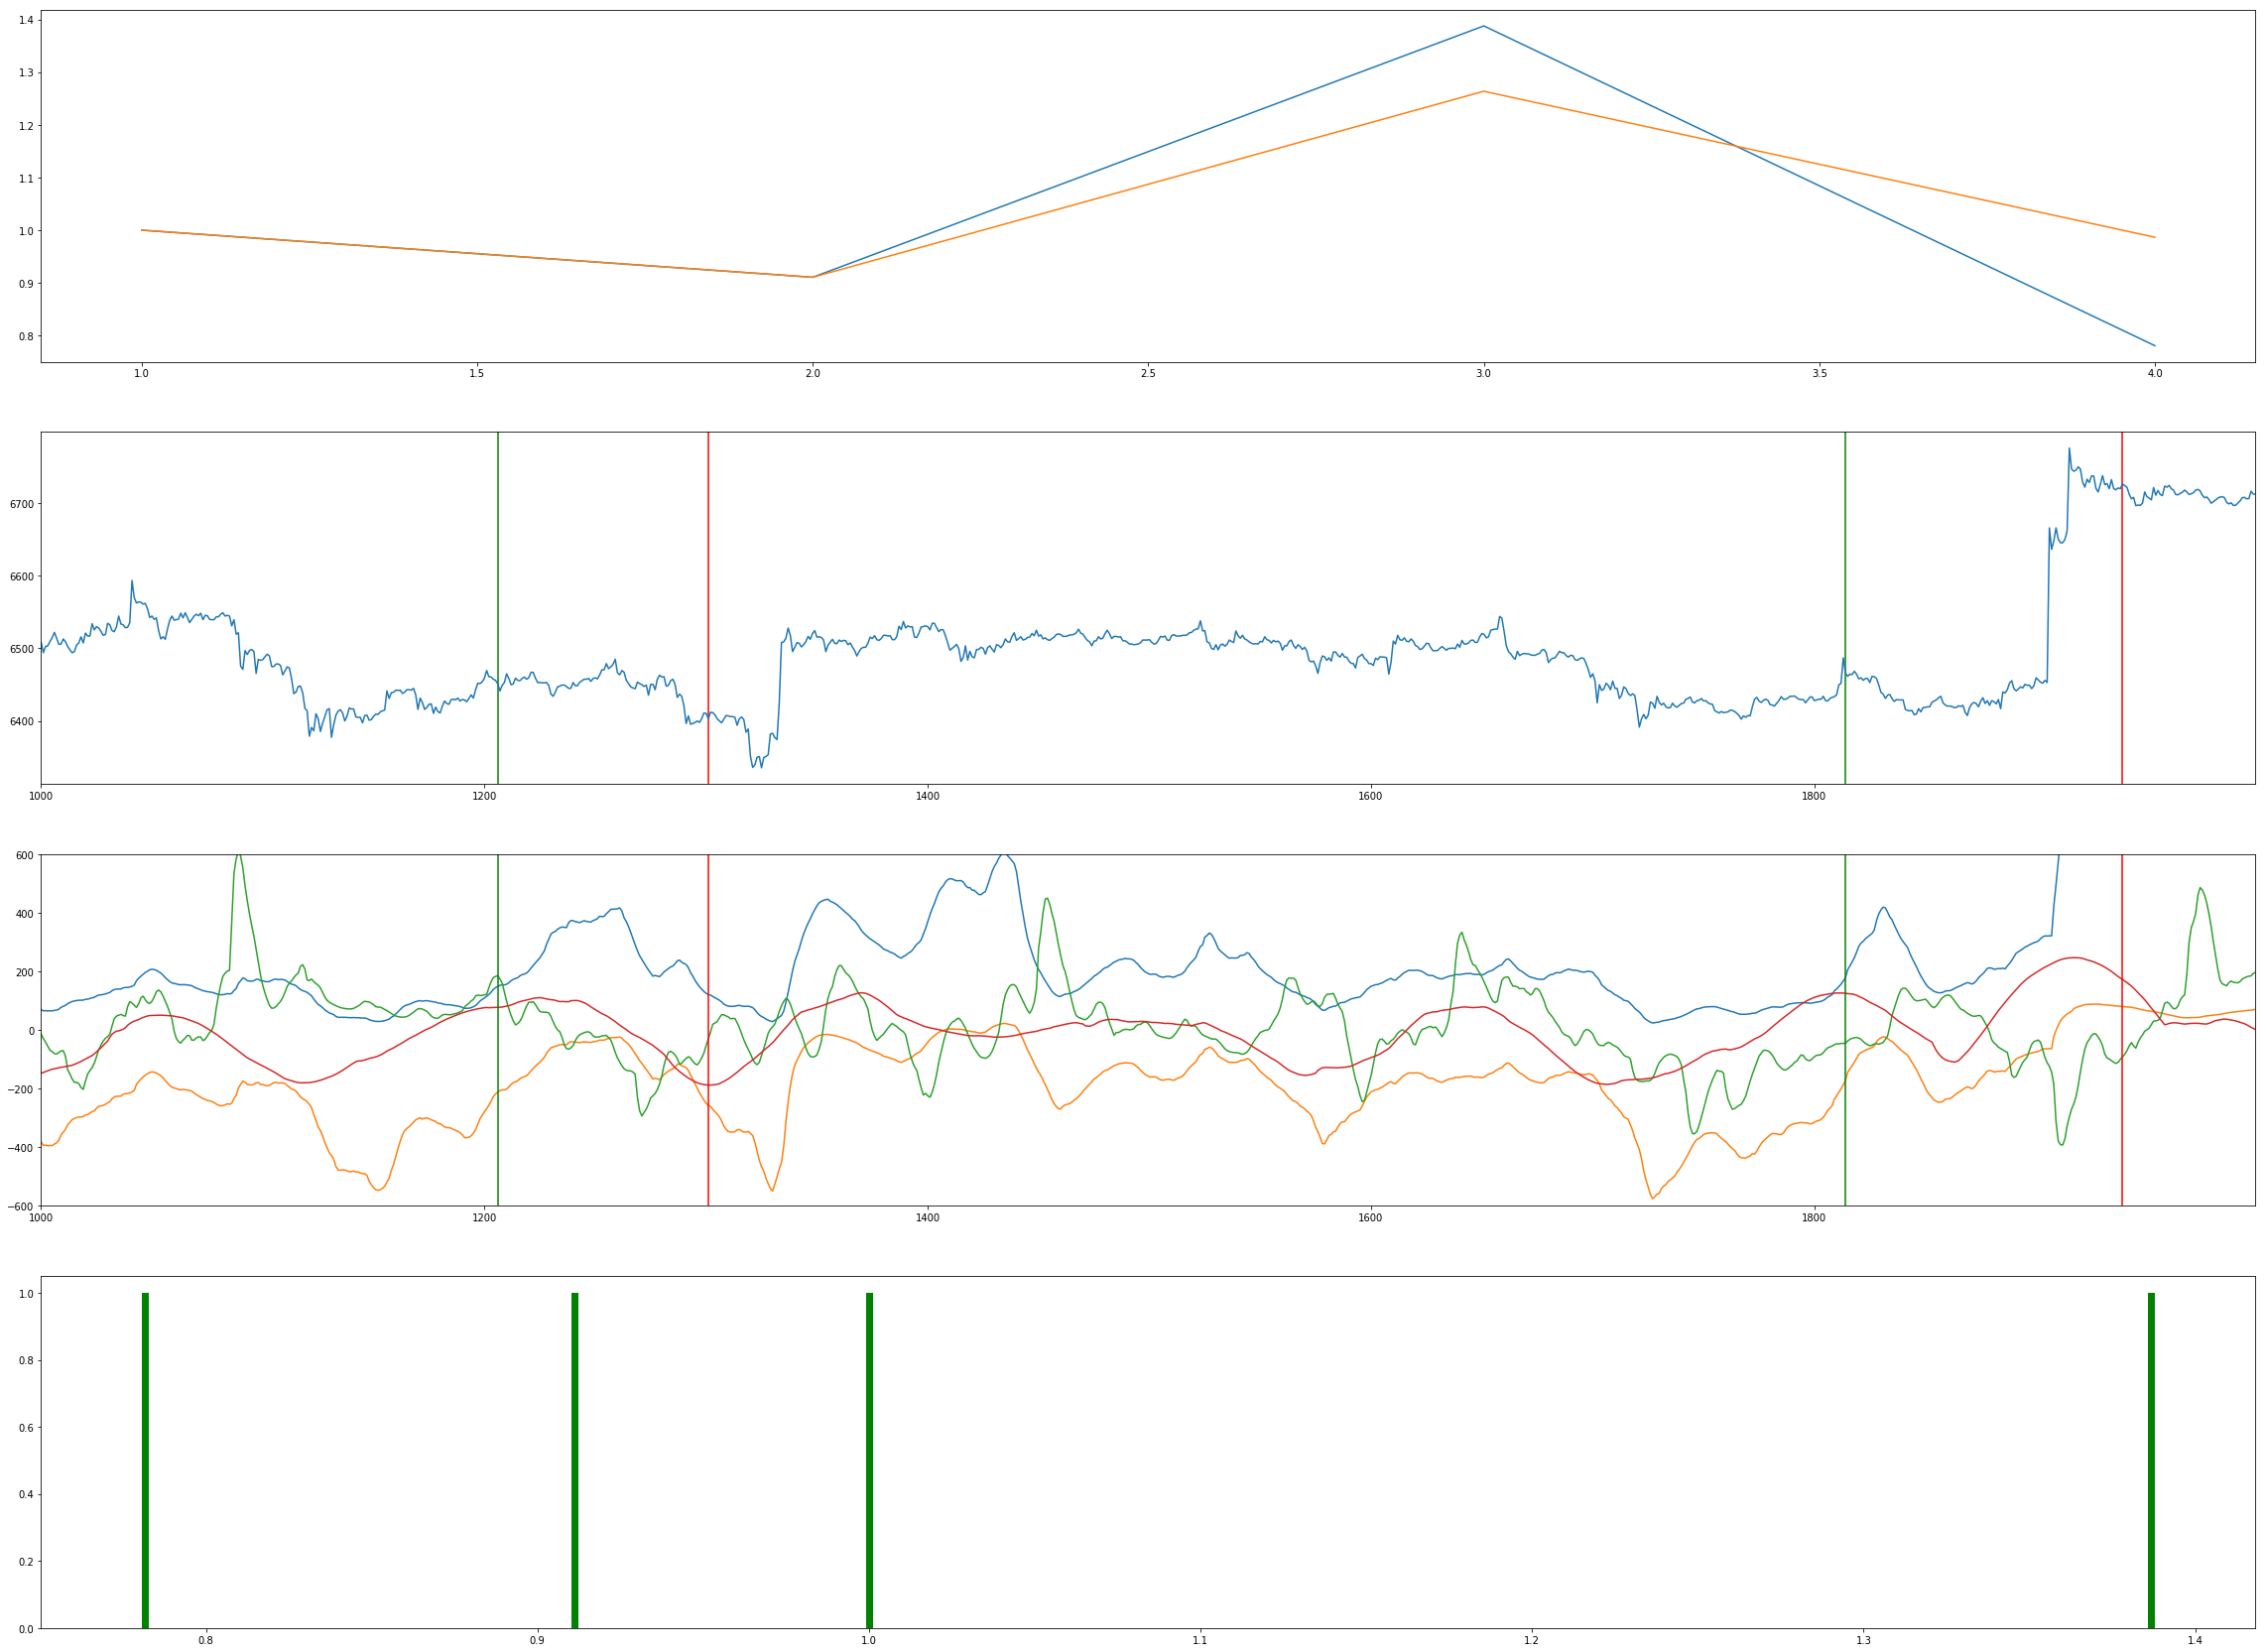

        1       2  time_in    time  length        CCI1        CCI2  \
0  6451.0  6403.0   1206.0  1301.0    95.0  151.223103 -371.651232   
1  6466.0  6726.5   1814.0  1939.0   125.0  213.570920   37.629851   
2  6728.5  6591.0   2137.0  2304.0   167.0  242.479768 -566.026923   
3  6588.5  6747.5   2338.0  2488.0     0.0   18.803496  -19.201494   

     CCIReal1    CCIReal2       pnl      pnlT  
0   77.601834 -187.876665  0.910593  0.910593  
1  125.182710  172.536950  1.387877  1.263791  
2  169.330112 -174.171337  0.780645  0.986572  
3 -114.820057   96.021162  0.000000  0.000000  


In [216]:
## This is 5 minutes, csv = 7_Jun16, CCI35 ##
##6/20/18
leverage = 10

var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 1
j_init = 1
j_max = j_init+10
for i in range(400, length):
    cci_absolute_edge =300
    himax[i] = RS_F_105[i]**2*cci_absolute_edge-100
    lomax[i] = 1/(RS_F_105[i]**2)*-1*cci_absolute_edge+150
    hi = himax[i]
    lo = lomax[i]
    #hi =50
    #lo =-5
    jmax = 2
    
    if (var[i]  >= hi and j == 0):
        j += 1
        if j == j_init:
            price[k, 0] = close[i]
            price[k, 2] = i
            price[k, 5] = var[i] 
            price[k, 7] = CCI1[i]
        
    elif j == j_init and high[i] > (1/leverage+1)*price[k,0] and X == 0:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        price[k, 6] = var[i]
        j = 0
        k = k+1
    elif j == j_init and low[i] < (1-1/leverage)*price[k,0] and X == 1:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        price[k, 6] = var[i]
        j = 0
        k = k+1
    elif (var[i] <= lo) and (j>=j_init):
        j = j+1
        if j == j_max:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k, 8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
    
    
    
    
J = np.arange(1000, 2000)




##Indicators and Executions

plt.subplot(4,1,3)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, CCI35B[J])
plt.plot(J, CCI1[J])
xcoords = price[:,2]
for xc in xcoords:
    plt.axvline(x=xc, color = 'g')
xcoords2 = price[:,3]
for xc in xcoords2:
    plt.axvline(x=xc, color = 'r')
axes = plt.gca()
axes.set_xlim([min(J),max(J)])
axes.set_ylim([-600, 600])
#plt.subplot(3,1,1)
#plt.plot(range())



#Plotting Close Prices and Trades

plt.subplot(4,1,2)
xcoords = price[:,2]
for xc in xcoords:
    plt.axvline(x=xc, color = 'g')
xcoords2 = price[:,3]
for xc in xcoords2:
    plt.axvline(x=xc, color = 'r')
plt.plot(J, close[J])
axes = plt.gca()
axes.set_xlim([min(J),max(J)])



##Profit & Loss##

plt.subplot(4,1,1)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')


##Pnl Histogram ##

plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl,300, density=False, facecolor='g', alpha=0.99)

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(np.median(pnl))
print(min(pnl))
print(np.average(pnl))

print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
#print(price)
plt.show()
print(price)

C:\ProgramData\Anaconda3\envs\domdecarlo\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


1.0
0.8779366543665434
1.0803632273507562
198.02702702702703
0
[11.31228083]


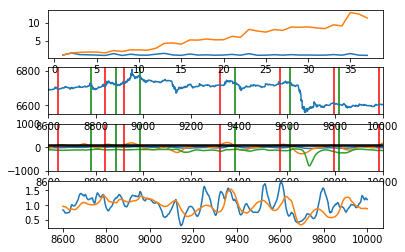

         1       2  time_in     time  length        CCI1        CCI2  \
0   6446.0  6294.5    400.0    594.0   194.0 -117.099617  103.239365   
1   6324.0  6286.0    643.0    845.0   202.0   45.371763  100.051016   
2   6328.0  6304.5    917.0   1061.0   144.0   49.457282  105.589389   
3   6487.5  6479.5   1228.0   1437.0   209.0   45.284245  106.160323   
4   6482.0  6504.0   1489.0   1635.0   146.0   47.542995  100.391976   
5   6505.5  6392.0   1683.0   1955.0   272.0   49.612761  104.909825   
6   6634.0  6655.0   2084.0   2214.0   130.0   48.486509  101.220693   
7   6659.5  6589.0   2254.0   2588.0   334.0   49.745514  104.424914   
8   6604.5  6597.0   2636.0   2912.0   276.0   49.521620  100.639121   
9   6590.5  6590.0   2935.0   3031.0    96.0   49.082992  104.167701   
10  6588.0  6517.0   3060.0   3286.0   226.0   45.868373  102.621886   
11  6544.0  6412.5   3419.0   3943.0   524.0   47.815984  105.050785   
12  6442.5  6427.0   4006.0   4133.0   127.0   44.999414  101.73

In [23]:
## This is 5 minutes, csv = 7_Jun16, CCI35 ##

leverage = 25

var = CCI1
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge = 50
    himax[i] = RS_F_205[i]**1.9*cci_absolute_edge-50
    lomax[i] = 1/(RS_F_205[i]**2.5)*-1*cci_absolute_edge-50*RS_F_105[i]**1

    #hi = himax[i]
    #lo = lomax[i]
    hi =100
    lo =50
    jmax = 2
    
    if (var[i] <= lo and  j == 0): #and var[i] >= himax[i]
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0] and X == 0:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        price[k, 6] = var[i]
        j = 0
        k = k+1
    elif j == 1 and low[i] < (1-1/leverage)*price[k,0] and X == 1:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        price[k, 6] = var[i]
        j = 0
        k = k+1
    elif (var[i] >= hi and j>=1): #and var[i] <= lomax[i]
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
    
    
    
J = np.arange(8600,10000)



annotes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
##Indicators and Executions
plt.subplot(4,1,3)
plt.plot(J, himax[J])
#af =  AnnoteFinder(J,himax[J], annotes, ax=ax)
#fig.canvas.mpl_connect('button_press_event', af)

#plt.plot(J, CCI105B[J])
#plt.plot(J, CCI35B[J])
plt.plot(J, CCI1[J])
plt.plot(J, lomax[J])
xcoords = price[:,2]
for xc in xcoords:
    plt.axvline(x=xc, color = 'g')
xcoords2 = price[:,3]
for xc in xcoords2:
    plt.axvline(x=xc, color = 'r')
plt.axhline(hi, color = 'k')
plt.axhline(lo, color = 'k')
axes = plt.gca()
axes.set_xlim([min(J),max(J)])
axes.set_ylim([-1000, 1000])

#plt.subplot(3,1,1)
#plt.plot(range())



#Plotting Close Prices and Trades
plt.subplot(4,1,2)
xcoords = price[:,2]
for xc in xcoords:
    plt.axvline(x=xc, color = 'g')
xcoords2 = price[:,3]
for xc in xcoords2:
    plt.axvline(x=xc, color = 'r')
plt.plot(J, close[J])
axes = plt.gca()
axes.set_xlim([min(J),max(J)])
#af =  AnnoteFinder(J,close[J], annotes, ax=ax)
#fig.canvas.mpl_connect('button_press_event', af)



##Profit & Loss##
plt.subplot(4,1,1)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')


##Pnl Histogram ##
plt.subplot(4,1,4)
#n, bins, patches = plt.hist(pnl,300, density=False, facecolor='g', alpha=0.99)
plt.plot(J, RS_F_105[J])
plt.plot(J, RS_F_205[J])
price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(np.median(pnl))
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
#print(price)
plt.show()
print(price)

In [ ]:
print(CCI)

In [ ]:
name

In [ ]:
price.loc[52, 'time']

In [ ]:
print(pd.DataFrame(CCIAli105B))

In [ ]:
4.579964*1.5759

In [119]:
1+(6500/6490 - 1-.00075*2)*25

1.0010208012326665

In [120]:
6495/6500

0.9992307692307693

In [ ]:
price.iloc[25, 1]

In [ ]:
high[price]

In [ ]:
1+1/leverage

In [ ]:
np.where(pnlT>10)

In [ ]:
np.where(pnlT>1000)

In [ ]:
price.loc[31, 'time']

In [ ]:
d

In [ ]:
price.loc[71, 'time']

In [ ]:
price[5:10,2]

In [ ]:
pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

In [ ]:
print(RS_F)

In [ ]:
plt.plot(J, RS_F_205[J])

In [ ]:
RS_F_205

In [ ]:
name

In [ ]:
high[-1:]

In [ ]:
high[10:95]

In [3]:
name = '7_Jun16.csv'

In [4]:
## CCI and RSI init only ##
time2=pd.Series(datetime.datetime.now().timetuple())
df1 = pd.read_csv(name)
df_all = pd.DataFrame(df1)
df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data


close = pd.Series(df_all['close'])
high = pd.Series(df_all['high'])
low = pd.Series(df_all['low'])#close values 
length = len(close)
l = length
CCIAli = pd.Series(np.zeros(l))
CCIAli106 = pd.Series(np.zeros(l))
CCIAli106B = pd.Series(np.zeros(l))
SMA = pd.Series(np.zeros(l))
madmat = pd.Series(np.zeros(l))
cci_len= 85
TP = (high+low+close)/3
for i in range(cci_len, length):
    SMA[i] = TP[i-cci_len:i].sum()/cci_len
    madmat[i] = mad(TP[i-cci_len:i])
    if madmat[i] == 0:
        CCIAli[i] = CCIAli[i-1]
    else: 
        CCIAli[i] = (TP[i]-SMA[i])/(.015*madmat[i])
j = 0

k = 0
#CCIAli105 = sp.signal.savgol_filter(CCIAli, 105, 3)
CCIAli105B = sp.signal.savgol_filter(CCIAli, 205, 3)

CCI105B = pd.Series(np.zeros(l))
w = 105
for i in range(cci_len+w, l):
    if i > cci_len+w:
        CCI105 = sp.signal.savgol_filter(CCIAli[i-w:i],w,3)
        CCI105B[i] = CCI105[-1:]
time3 = pd.Series(datetime.datetime.now().timetuple())

           #print(RSIclose[i])
Mytime = (time3[5]-time2[5])
print(Mytime)


17


In [ ]:
CCI105B = pd.Series(np.zeros(l))
w = 105
for i in range(cci_len+w, l):
    if i > cci_len+w:
        CCI105 = sp.signal.savgol_filter(CCIAli[i-w:i],w,3)
        CCI105B[i] = CCI105[-1:]

In [184]:
## CCI and RSI init only ## ##CCI25 ##
time2=pd.Series(datetime.datetime.now().timetuple())
df1 = pd.read_csv(name)
df_all = pd.DataFrame(df1)
df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

cci_len = 85
close = pd.Series(df_all['close'])
high = pd.Series(df_all['high'])
low = pd.Series(df_all['low'])#close values 
length = len(close)
l = length
CCI105 = pd.Series(np.zeros(l))
CCIAli106 = pd.Series(np.zeros(l))
CCIAli106B = pd.Series(np.zeros(l))
SMA = pd.Series(np.zeros(l))
madmat = pd.Series(np.zeros(l))
cci_len_35= 85
TP = (high+low+close)/3
for i in range(cci_len, length):
    SMA[i] = TP[i-cci_len:i].sum()/cci_len
    madmat[i] = mad(TP[i-cci_len:i])
    if madmat[i] == 0:
        CCI105[i] = CCI105[i-1]
    else: 
        CCI105[i] = (TP[i]-SMA[i])/(.015*madmat[i])
j = 0
k = 0
#CCIAli105 = sp.signal.savgol_filter(CCIAli, 105, 3)
CCIAli105B = sp.signal.savgol_filter(CCI105, 205, 3)


           #print(RSIclose[i])

CCI105B = pd.Series(np.zeros(l))
w = 105
for i in range(cci_len+w, l):
    if i > cci_len+w:
        CCI1051 = sp.signal.savgol_filter(CCI105[i-w:i],w,3)
        CCI105B[i] = CCI1051[-1:]
        
        Mytime = (time3[5]-time2[5])
time3 = pd.Series(datetime.datetime.now().timetuple())
print(Mytime)


26


In [138]:
CCI35B = pd.Series(np.zeros(l))
w = 35
for i in range(cci_len+w, l):
    if i > cci_len+w:
        CCI1051 = sp.signal.savgol_filter(CCI105[i-w:i],w,3)
        CCI35B[i] = CCI1051[-1:]

In [ ]:
for i in range(cci_len, len(close)):
    CCIAli105[i] = sp.signal.savgol_filter(CCI[])

In [187]:
CCI1 = sp.signal.savgol_filter(CCI105,105,3)

In [183]:
name = '7_5_Jun20.csv'
M = 7/5
dl(M*1440, name)

In [ ]:
name = '7_Jun16.csv'

In [181]:
def dl(end, name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            query['start'] += count
            if query['start'] > end:
                break
            if len(data) < count:
                break

In [ ]:
def dl1m(start, end,name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': start,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            #data2 = pd.DataFrame
            query['start'] += count
            if query['start'] > end:
                break
            if len(data) < count:
                break

In [ ]:
boys_now = 1

while True:
    time.sleep(1)
    t = pd.Series(datetime.datetime.now().timetuple())
    if t[5] == 0:
        dlCCI1m(900, '1440j3_try.csv')
        
    else:
        boys_now


In [186]:
f=0
d=0
rsi_len = 105
change_close = pd.Series(np.zeros(l))
gain = pd.Series(np.zeros(l))
loss = pd.Series(np.zeros(l))
smagain = pd.Series(np.zeros(l))
smaloss = pd.Series(np.zeros(l))
RS = pd.Series(np.zeros(l))
RSI100 = pd.Series(np.zeros(l))
dRdt = pd.Series(np.zeros(l))
dR2dt = pd.Series(np.zeros(l))
for i in range(1,len(close)):   
    #print(close[i])
    change_close[i] = close[i]-close[i-1]
    if change_close[i] > 0:
        gain[i] = change_close[i]
    elif change_close[i] < 0:
        loss[i] = change_close[i]*-1
    elif change_close[i] == 0.00000:
        loss[i] = 0
        gain[i] = 0
    if i == rsi_len:   
        smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
    elif i > rsi_len: 
        smagain[i] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[i] = loss[i-rsi_len:i].sum()/rsi_len
        if smaloss[i] == 0:
            RSI100[i] = 100
        else:
            RS[i] = smagain[i]/smaloss[i]
            RSI100[i] = 100 - 100/(1+RS[i])
           #print(RSIclose[i])
        
RS_F_105 = pd.Series(np.zeros(l))

w = 105
for i in range(rsi_len+w, l):
    if i > cci_len+w:
        RSF = sp.signal.savgol_filter(RS[i-w:i],w,3)
        
        RS_F_105[i] = RSF[-1:]

In [ ]:
fil = sp.signal.savgol_filter(RSI100, 105, 3)

In [185]:
f=0
d=0
rsi_len = 205
change_close = pd.Series(np.zeros(l))
gain = pd.Series(np.zeros(l))
loss = pd.Series(np.zeros(l))
smagain = pd.Series(np.zeros(l))
smaloss = pd.Series(np.zeros(l))
RS = pd.Series(np.zeros(l))
RSI100 = pd.Series(np.zeros(l))
dRdt = pd.Series(np.zeros(l))
dR2dt = pd.Series(np.zeros(l))
for i in range(1,len(close)):   
    #print(close[i])
    change_close[i] = close[i]-close[i-1]
    if change_close[i] > 0:
        gain[i] = change_close[i]
    elif change_close[i] < 0:
        loss[i] = change_close[i]*-1
    elif change_close[i] == 0.00000:
        loss[i] = 0
        gain[i] = 0
    if i == rsi_len:   
        smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
    elif i > rsi_len: 
        smagain[i] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[i] = loss[i-rsi_len:i].sum()/rsi_len
        if smaloss[i] == 0:
            RSI100[i] = 100
        else:
            RS[i] = smagain[i]/smaloss[i]
            RSI100[i] = 100 - 100/(1+RS[i])
           #print(RSIclose[i])
        
RS_F_205 = pd.Series(np.zeros(l))
w = rsi_len
for i in range(rsi_len+w, l):
    if i > cci_len+w:
        RSF = sp.signal.savgol_filter(RS[i-w:i],w,3)
        RS_F_205[i] = RSF[-1:]